In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from PIL import Image

# 獲取資料集
mnist = tf.keras.datasets.mnist
(Train_Image, Train_Label), (Test_Image, Test_Label) = mnist.load_data()

# 資料處理, 正規化
Train_Image = Train_Image.astype('float32') / 255.0
Test_Image = Test_Image.astype('float32') / 255.0

# 因為使用的 loss function 是 Cross_entropy, 需要轉換
Train_Label = to_categorical(Train_Label)
Test_Label = to_categorical(Test_Label)

In [2]:
# 建立模型
# 一層隱藏
# 一層 softmax 轉成機率輸出
model = models.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Train_Image, Train_Label, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2585 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1137 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0767 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0582 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0457 - accuracy: 0.9858


In [3]:
# 使用測試集進行預測
predictions = model.predict(Test_Image)
test_loss, test_accuracy = model.evaluate(Test_Image, Test_Label, verbose=0)
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(test_accuracy*100.0))  

313/313 [==============================] - 0s 810us/step
	[Info] Accuracy of testing data = 97.7%


1/1 [==============================] - 0s 14ms/step


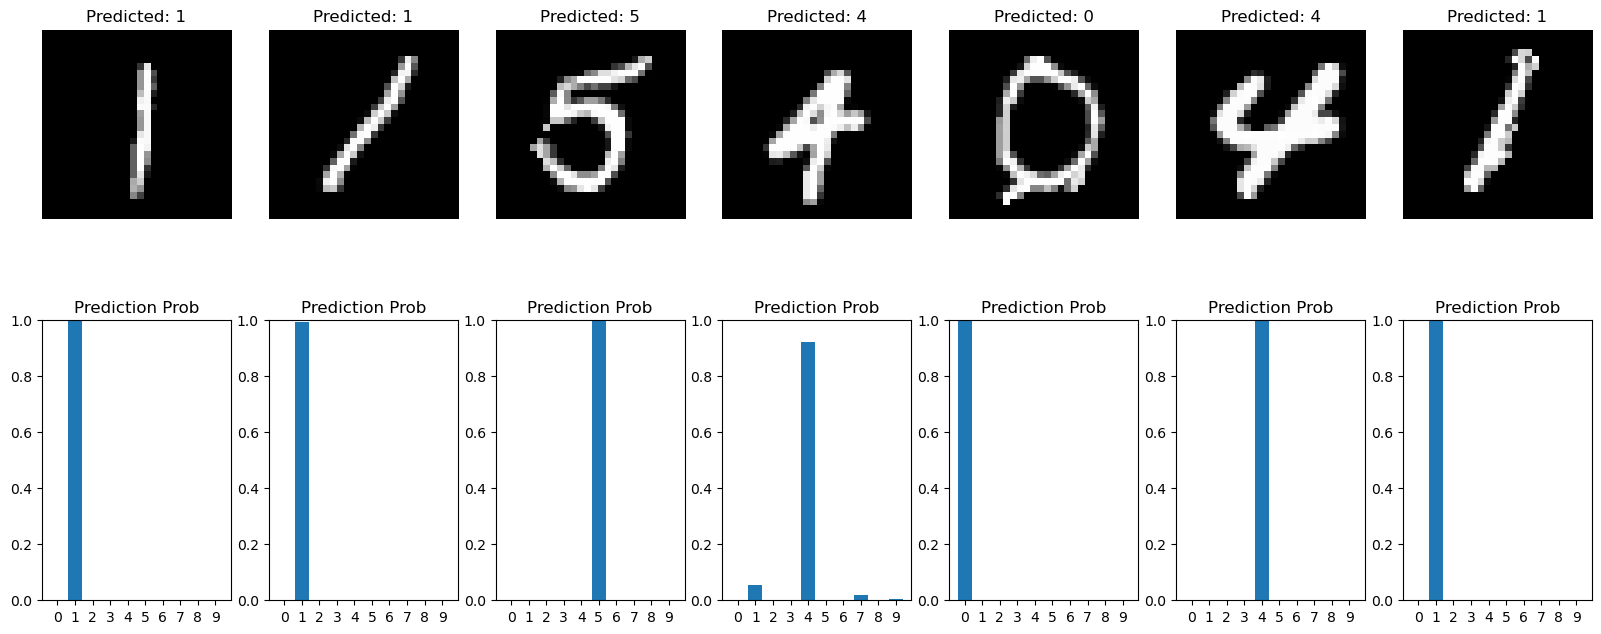

Predicted digits: [1, 1, 5, 4, 0, 4, 1]


In [4]:
def predict_digit(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img).astype('float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    prediction = model.predict(img_array)
    return prediction[0]
image_paths = [f"{i}.png" for i in range(1, 8)]
predictions = [predict_digit(path) for path in image_paths]

# 繪製圖表
plt.figure(figsize=(20, 8))
for i, (path, pred) in enumerate(zip(image_paths, predictions)):
    img = Image.open(path).convert('L')
    # 圖片
    plt.subplot(2, 7, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Predicted: {np.argmax(pred)}')
    
    # 預測機率的直方圖
    plt.subplot(2, 7, i + 8)
    plt.bar(range(10), pred)
    plt.title('Prediction Prob')
    plt.xticks(range(10))
    plt.ylim([0, 1])
plt.show()

print("Predicted digits:", [np.argmax(pred) for pred in predictions])